In [1]:
%cd D:\Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading
%load_ext autoreload
%autoreload 2
from shading_model import *
from data_utils import *
from torch.autograd import Variable

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

device = torch.device("cuda")

D:\Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading


In [2]:
trainset = AODataset("\\Dropbox (GaTech)\\CS7643 Deep Learning\\Deep-Shading\\example_data\\AO\\", split="test")
#subset_indices = list(range(1))
#trainset = torch.utils.data.Subset(trainset, subset_indices)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=0)

D:\Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\
Successfully loaded 8 images from \Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\test_position.txt
D:\Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\
Successfully loaded 8 images from \Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\test_normal.txt
D:\Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\
Successfully loaded 8 images from \Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\test_groundtruth.txt


In [3]:
model = ShadingModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()
loss_func = nn.MSELoss()

for epoch in range(20):
    for i, data in enumerate(dataloader, 0):
        pos, normal, gt = data
        pos, normal, gt = Variable(pos).to(device), Variable(normal).to(device), Variable(gt).to(device)
        pos = pos.permute(0, 3, 1, 2)
        normal = normal.permute(0, 3, 1, 2)
        gt = gt.unsqueeze(1)
        optimizer.zero_grad()
        image = torch.cat((normal, pos), 1)
        outputs = model(image)
        loss = model.loss(outputs, gt)
        #loss = loss_func(outputs, gt)
        loss.backward()
        optimizer.step()
    print(epoch, loss.item())

0 0.4180172085762024
1 0.2371898889541626
2 0.27244681119918823
3 0.22899794578552246
4 0.21835294365882874
5 0.20737648010253906
6 0.21625706553459167
7 0.2136044204235077
8 0.20659038424491882
9 0.22027724981307983
10 0.20763379335403442
11 0.22004055976867676
12 0.21072563529014587
13 0.21052902936935425
14 0.21650144457817078
15 0.20318764448165894
16 0.21693730354309082
17 0.20280128717422485
18 0.1984827220439911
19 0.21034815907478333


In [4]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model.train()
for epoch in range(40):
    for i, data in enumerate(dataloader, 0):
        pos, normal, gt = data
        pos, normal, gt = Variable(pos).to(device), Variable(normal).to(device), Variable(gt).to(device)
        pos = pos.permute(0, 3, 1, 2)
        normal = normal.permute(0, 3, 1, 2)
        gt = gt.unsqueeze(1)
        optimizer.zero_grad()
        image = torch.cat((normal, pos), 1)
        outputs = model(image)
        loss = model.loss(outputs, gt)
        #loss = loss_func(outputs, gt)
        loss.backward()
        optimizer.step()
    print(epoch, loss.item())

0 0.20875823497772217
1 0.19947370886802673
2 0.19326350092887878
3 0.2010747492313385
4 0.20689797401428223
5 0.20153698325157166
6 0.21810230612754822
7 0.21004202961921692
8 0.2040562927722931
9 0.2087438404560089
10 0.21576273441314697
11 0.20872291922569275
12 0.2190067172050476
13 0.21024134755134583
14 0.19230404496192932
15 0.2175908088684082
16 0.20665588974952698
17 0.20783209800720215
18 0.20956963300704956
19 0.2118377387523651
20 0.21307256817817688
21 0.1972779631614685
22 0.21854877471923828
23 0.20702862739562988
24 0.215036541223526
25 0.20746636390686035
26 0.2057664692401886
27 0.206232488155365
28 0.20932501554489136
29 0.20816156268119812
30 0.2095004916191101
31 0.19788023829460144
32 0.20034241676330566
33 0.2089371681213379
34 0.21153545379638672
35 0.1916925311088562
36 0.19685477018356323
37 0.20778882503509521
38 0.20554989576339722
39 0.20529648661613464


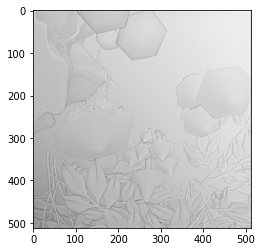

In [7]:
image = torch.cat((normal, pos), 1)
model.eval()
i = model(image)
pic = i.squeeze(1).cpu().data[0].numpy()
plt.imshow(pic, cmap='gray')

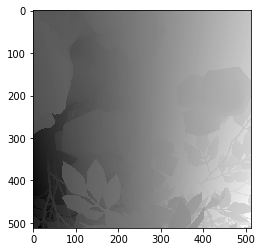

In [10]:
pic = pos[:,0,:,:].cpu().data[0].numpy()
plt.imshow(pic, cmap='gray')

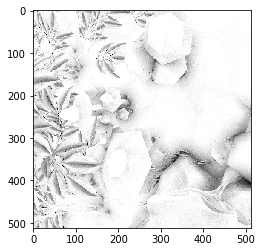

In [7]:
pic = gt.squeeze(1).cpu().data[0].numpy()
plt.imshow(pic, cmap='gray')

In [18]:
pic = exr_loader("./Position/000000000..exr", ndim=3)

D:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [7]:
from torchsummary import summary
print(image.size())
summary(model, (6,512,512))

torch.Size([8, 6, 512, 512])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 512, 512]             440
         LeakyReLU-2          [-1, 8, 512, 512]               0
         AvgPool2d-3          [-1, 8, 256, 256]               0
            Conv2d-4         [-1, 16, 256, 256]             592
         LeakyReLU-5         [-1, 16, 256, 256]               0
         AvgPool2d-6         [-1, 16, 128, 128]               0
            Conv2d-7         [-1, 32, 128, 128]           1,184
         LeakyReLU-8         [-1, 32, 128, 128]               0
         AvgPool2d-9           [-1, 32, 64, 64]               0
           Conv2d-10           [-1, 64, 64, 64]           2,368
        LeakyReLU-11           [-1, 64, 64, 64]               0
        AvgPool2d-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 32, 32]           4,736
        Le

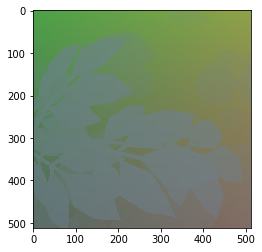

In [19]:
plt.imshow(pic)

In [24]:
# task = "AO", "GI",...
# buffers = a list of "position", "normal", "groundtruth",...
def load_train(task, buffers=None):
    result = {}
    if task == "AO":
        if buffers is None:
            buffers = ["position", "normal", "groundtruth"]
        for buffer_type in buffers:
            result[buffer_type] = load_one_file("./dataset/training_" + buffer_type + ".txt")
    return result

In [28]:
def load_one_file(filename):
    with open(filename) as f:
        images = []
        for line in f.readlines():
            path = line.split()[0]
            images.append(exr_loader(path, ndim=3)) # really 3 ??
    return np.array(images)

In [31]:
data = load_train("AO", ["groundtruth"])

D:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [46]:
%cd D:\Dropbox (GaTech)\CS7643 Deep Learning\DL4CG

D:\Dropbox (GaTech)\CS7643 Deep Learning\DL4CG


In [62]:
import OpenEXR
import Imath

# read image and its dataWindow to obtain its size
pic = OpenEXR.InputFile("./GI/Conference/Normals/000000000..exr")
pic.header()

{'channels': {'A': HALF (1, 1),
  'B': HALF (1, 1),
  'G': HALF (1, 1),
  'R': HALF (1, 1)},
 'compression': NO_COMPRESSION,
 'dataWindow': (0, 0) - (255, 255),
 'displayWindow': (0, 0) - (255, 255),
 'lineOrder': INCREASING_Y,
 'pixelAspectRatio': 1.0,
 'screenWindowCenter': (0.0, 0.0),
 'screenWindowWidth': 1.0}

In [67]:
# read image and its dataWindow to obtain its size
pic = OpenEXR.InputFile("./IBL/Conference/Specular/000000000..exr")
print(pic.header())

pt = Imath.PixelType(Imath.PixelType.FLOAT)
dw = pic.header()['dataWindow']
size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)

pt = Imath.PixelType(Imath.PixelType.FLOAT)

channel = np.fromstring(pic.channel('B', pt), dtype=np.float32)
channel.shape = (size[1], size[0])  # Numpy arrays are (row, col)
np.array(channel)

{'channels': {'A': HALF (1, 1), 'B': HALF (1, 1), 'G': HALF (1, 1), 'R': HALF (1, 1)}, 'compression': NO_COMPRESSION, 'dataWindow': (0, 0) - (255, 255), 'displayWindow': (0, 0) - (255, 255), 'lineOrder': INCREASING_Y, 'pixelAspectRatio': 1.0, 'screenWindowCenter': (0.0, 0.0), 'screenWindowWidth': 1.0}


D:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


array([[0.3046875 , 0.3046875 , 0.3046875 , ..., 0.3046875 , 0.3046875 ,
        0.3046875 ],
       [0.3046875 , 0.3046875 , 0.3046875 , ..., 0.3046875 , 0.3046875 ,
        0.3046875 ],
       [0.3046875 , 0.3046875 , 0.3046875 , ..., 0.3046875 , 0.3046875 ,
        0.3046875 ],
       ...,
       [0.11938477, 0.11938477, 0.11938477, ..., 0.5444336 , 0.5444336 ,
        0.5444336 ],
       [0.11938477, 0.11938477, 0.11938477, ..., 0.5444336 , 0.5444336 ,
        0.5444336 ],
       [0.11938477, 0.11938477, 0.11938477, ..., 0.5444336 , 0.5444336 ,
        0.5444336 ]], dtype=float32)

D:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


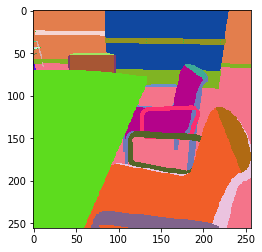

In [70]:
pic = exr_loader("./IBL/Conference/Specular/000000000..exr", ndim=3)
plt.imshow(pic)